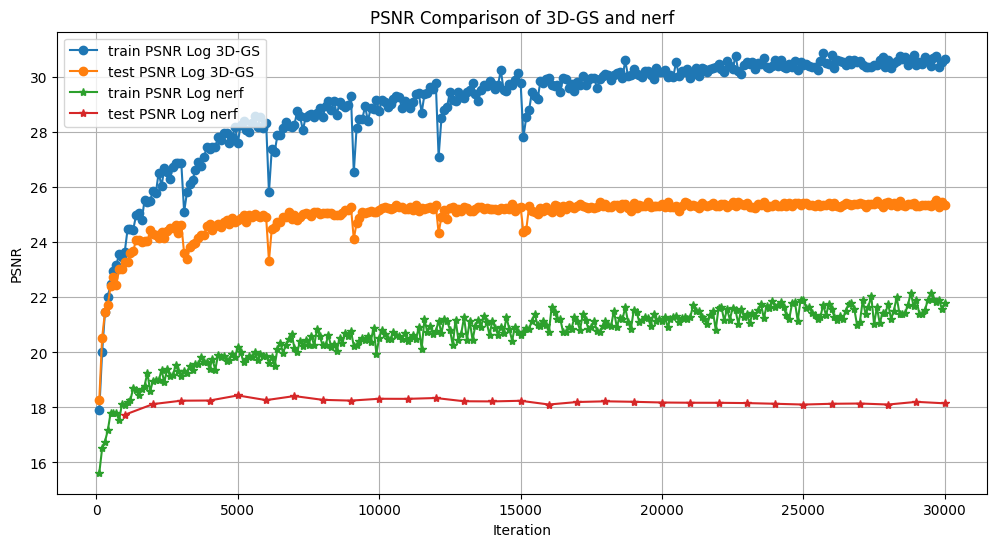

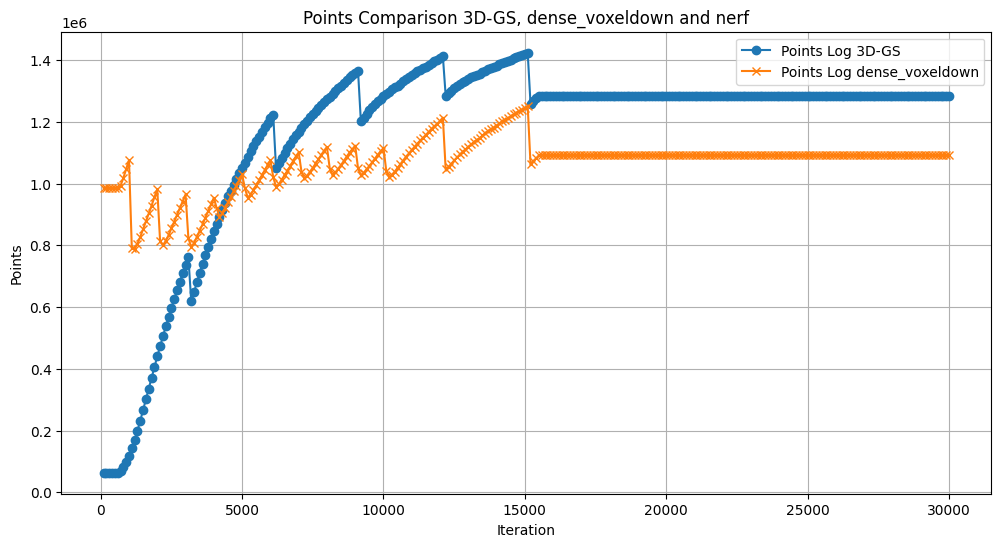

In [10]:
# 由于代码执行环境被重置，我将重新定义函数和绘图逻辑，但请注意，实际文件路径需要根据您的环境进行调整。
import matplotlib.pyplot as plt
import re

# 日志文件路径
log_file_1 = 'output/stone/train.log'
log_file_2 = 'output/dense_stone_voxeldown/train.log'
log_file_3 = './nerf.log'
type1="3D-GS"
type2="dense_voxeldown"
type3="nerf"

# 解析日志文件函数
def parse_log_from_file(file_path):
    with open(file_path, 'r') as file:
        log_content = file.read()
        return parse_log(log_content)

def parse_log_from_file2(file_path):
    with open(file_path, 'r') as file:
        log_content = file.read()
        return parse_log2(log_content)
    
# 基于之前的解析日志内容函数
def parse_log(log):
    iter_pattern = re.compile(r"\[ITER (\d+)\] Evaluating (test|train): L1 (\d+\.\d+) PSNR (\d+\.\d+) points (\d+)")
    data = {'test_PSNR': [], 'train_PSNR': [], 'points': [], 'iterations': []}
    for match in iter_pattern.finditer(log):
        iteration, phase, l1, psnr, points = match.groups()
        iteration = int(iteration)
        psnr = float(psnr)
        if phase == 'test':
            data['test_PSNR'].append(psnr)
        else:
            data['train_PSNR'].append(psnr)
        if iteration not in data['iterations']:
            data['iterations'].append(iteration)
            data['points'].append(int(points))
    return data['iterations'],data['train_PSNR'],data['test_PSNR'],data['points']

# [TRAIN] Iter: 10600 Loss: 0.030993618071079254  PSNR: 18.0644588470459

def parse_log2(log):
    iter_pattern = re.compile(r"\[(TRAIN|TEST)\] Iter: (\d+) Loss: (\d+\.\d+)  PSNR: (\d+\.\d+)")
    data = {'train_PSNR': [],'test_PSNR': [],'train_iterations': [],'test_iterations': []}
    for match in iter_pattern.finditer(log):
        phase,iteration, loss, psnr = match.groups()
        iteration = int(iteration)
        # iteration = int(iteration/5)
        psnr = float(psnr)
        if iteration>30000:
            continue
        if phase == 'TEST':
            data['test_iterations'].append(iteration)
            data['test_PSNR'].append(psnr)
        else:
            data['train_iterations'].append(iteration)
            data['train_PSNR'].append(psnr)
    return data['train_iterations'],data['train_PSNR'],data['test_iterations'],data['test_PSNR']
        
# 假设日志文件位于指定路径，请根据您的实际情况调整路径
iters1, train_psnrs1, test_psnrs1,points1 = parse_log_from_file(log_file_1)
iters2, train_psnrs2, test_psnrs2, points2 = parse_log_from_file(log_file_2)
iters3_1, train_psnrs3, iters3_2,test_psnrs3 = parse_log_from_file2(log_file_3)
# print(iters3)

# 绘制PSNR对比图
plt.figure(figsize=(12, 6))
plt.plot(iters1, train_psnrs1, label=f'train PSNR Log {type1}', marker='o')
# plt.plot(iters2, train_psnrs2, label=f'train PSNR Log {type2}', marker='1')
plt.plot(iters1, test_psnrs1, label=f'test PSNR Log {type1}', marker='o')
# plt.plot(iters2, test_psnrs2, label=f'test PSNR Log {type2}', marker='x')
plt.plot(iters3_1, train_psnrs3, label=f'train PSNR Log {type3}', marker='*')
plt.plot(iters3_2, test_psnrs3, label=f'test PSNR Log {type3}', marker='*')
plt.xlabel('Iteration')
plt.ylabel('PSNR')
plt.title(f'PSNR Comparison of {type1} and {type3}')
plt.legend()
plt.grid(True)

# 绘制点数对比图
plt.figure(figsize=(12, 6))
plt.plot(iters1, points1, label=f'Points Log {type1}', marker='o')
plt.plot(iters2, points2, label=f'Points Log {type2}', marker='x')
# plt.plot(iters3, points3, label=f'Points Log {type3}', marker='*')
plt.xlabel('Iteration')
plt.ylabel('Points')
plt.title(f'Points Comparison {type1}, {type2} and {type3}')
plt.legend()
plt.grid(True)

plt.show()


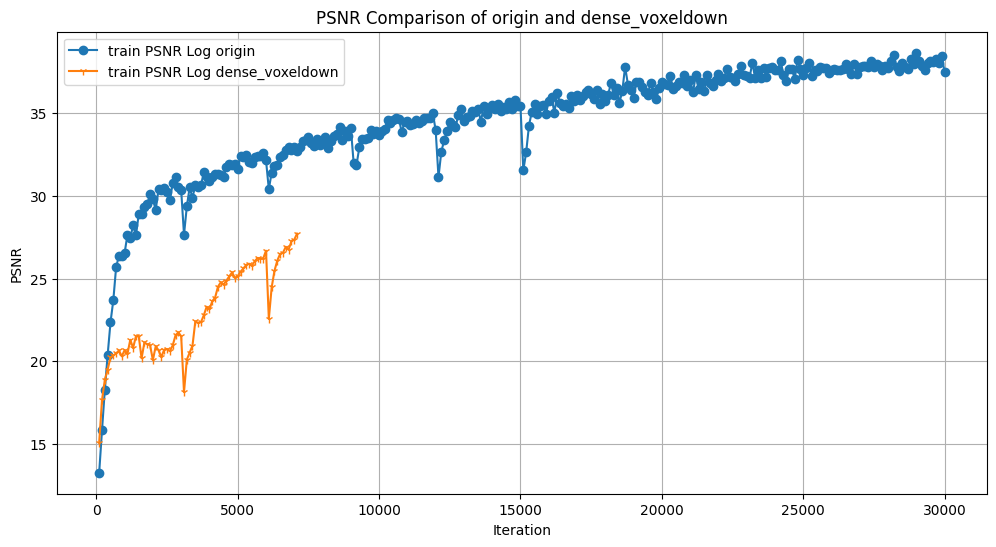

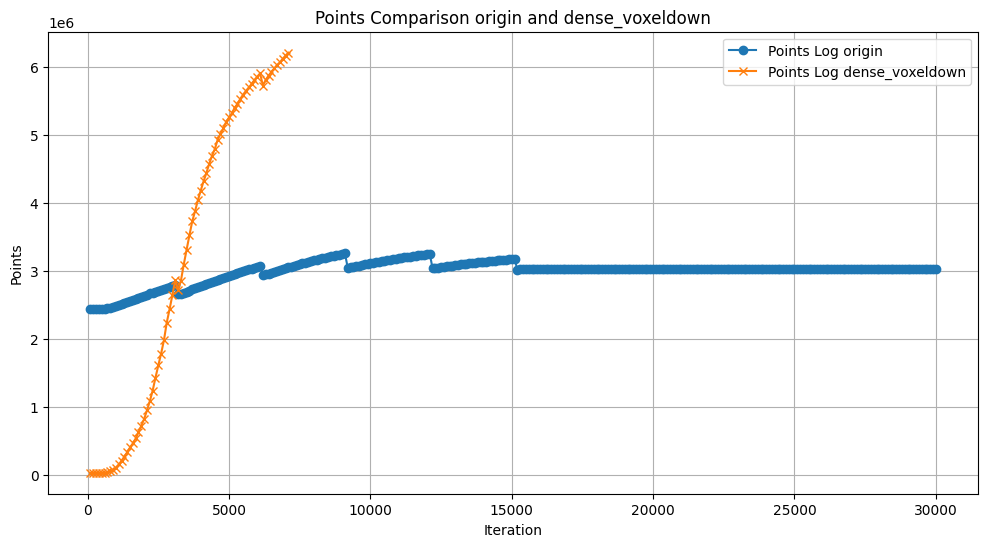

In [8]:
# 由于代码执行环境被重置，我将重新定义函数和绘图逻辑，但请注意，实际文件路径需要根据您的环境进行调整。
import matplotlib.pyplot as plt
import re

# 日志文件路径
# log_file_1 = 'train_origin_playroom_1.log'
# log_file_2 = '../GaussianPro/output/playroom/train.log'
# log_file_2 = 'train_origin_playroom_1.log'
type1="origin"
type2="dense_voxeldown"

# 解析日志文件函数
def parse_log_from_file(file_path):
    with open(file_path, 'r') as file:
        log_content = file.read()
        return parse_log(log_content)

# 基于之前的解析日志内容函数
def parse_log(log):
    iter_pattern = re.compile(r"\[ITER (\d+)\] Evaluating (test|train): L1 (\d+\.\d+) PSNR (\d+\.\d+) points (\d+)")
    data = {'test_PSNR': [], 'train_PSNR': [], 'points': [], 'iterations': []}
    for match in iter_pattern.finditer(log):
        iteration, phase, l1, psnr, points = match.groups()
        iteration = int(iteration)
        psnr = float(psnr)
        if phase == 'test':
            data['test_PSNR'].append(psnr)
        else:
            data['train_PSNR'].append(psnr)
        if iteration not in data['iterations']:
            data['iterations'].append(iteration)
            data['points'].append(int(points))
    return data['iterations'],data['train_PSNR'],data['test_PSNR'],data['points']


# 假设日志文件位于指定路径，请根据您的实际情况调整路径
iters1, train_psnrs1, test_psnrs1,points1 = parse_log_from_file(log_file_1)
iters2, train_psnrs2, test_psnrs2, points2 = parse_log_from_file(log_file_2)

# 绘制PSNR对比图
plt.figure(figsize=(12, 6))
plt.plot(iters1, train_psnrs1, label=f'train PSNR Log {type1}', marker='o')
plt.plot(iters2, train_psnrs2, label=f'train PSNR Log {type2}', marker='1')
# plt.plot(iters1, test_psnrs1, label=f'test PSNR Log {type1}', marker='o')
# plt.plot(iters2, test_psnrs2, label=f'test PSNR Log {type2}', marker='x')
# plt.plot(iters1, [train_psnrs1[i]-test_psnrs1[i] for i in range(len(iters1))], label=f'train-test PSNR Log {type1}', marker='o')
# plt.plot(iters2, [train_psnrs2[i]-test_psnrs2[i] for i in range(len(iters2))], label=f'train-test PSNR Log {type2}', marker='x')
plt.xlabel('Iteration')
plt.ylabel('PSNR')
plt.title(f'PSNR Comparison of {type1} and {type2}')
plt.legend()
plt.grid(True)

# 绘制点数对比图
plt.figure(figsize=(12, 6))
plt.plot(iters1, points1, label=f'Points Log {type1}', marker='o')
plt.plot(iters2, points2, label=f'Points Log {type2}', marker='x')
plt.xlabel('Iteration')
plt.ylabel('Points')
plt.title(f'Points Comparison {type1} and {type2}')
plt.legend()
plt.grid(True)

plt.show()
